# Exploration Data Analysis & Pre-Processing

## Preliminary Operations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', 1000) 
#pd.set_option('display.max_colwidth', None)

In [2]:
# Trattamento dei valori mancanti
#df['claim'] = df['claim'].fillna('')  # Riempie i valori mancanti con una stringa vuota->potrebbe servire se non si applica la rimozione della punteggiatura

# Converti tutte le frasi in minuscolo
#df['claim'] = df['claim'].str.lower()

# Rimuovi la punteggiatura
#df['claim'] = df['claim'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)) if isinstance(x, str) else x)

# Tokenization
#df['claim'] = df['claim'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

# Rimuovi le stop words
#stop_words = set(stopwords.words('english'))
#df['claim'] = df['claim'].apply(lambda x: [word for word in x if word not in stop_words] if isinstance(x, list) else x)

# Lemmatizzazione
#lemmatizer = WordNetLemmatizer()
#df['claim'] = df['claim'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x] if isinstance(x, list) else x)

# Stemming
#ps = PorterStemmer()
#df['claim'] = df['claim'].apply(lambda x: [ps.stem(word) for word in x])

## PubHealth Dataset


### Train Dataset

In [3]:
df_train = pd.read_csv(r'C:\Users\c.farallo\OneDrive - BE THINK, SOLVE, EXECUTE S.P.A\Desktop\Thesis\PUBHEALTH\train.tsv', sep='\t')
df_train

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,
...,...,...,...,...,...,...,...,...,...
9827,35948,The Sturgis motorcycle rally in 2020 resulted ...,"September 10, 2020","They want to know if mass-events (protests, co...",Dan Evon,"In September 2020, social media was abuzz over...",,unproven,"Politics Medical, COVID-19"
9828,401,AstraZeneca's infant respiratory drug prioriti...,"September 25, 1995",Britain’s AstraZeneca said a potential medicin...,,The “Breakthrough Therapy” and “Prime” designa...,,true,Health News
9829,2023,Testicular cancer deaths double with after 40 ...,"February 10, 2011",Men diagnosed with testicular cancer at 40 yea...,,This was true even when initial treatment and ...,http://bit.ly/fGNEw9,true,Health News
9830,38118,The FDA published “conclusive proof” that the...,"November 22, 2017",FDA Confirms DTaP Vaccine Causes Autism in Nov...,Rich Buhler & Staff,The FDA hasn’t confirmed a link between DTaP v...,https://www.truthorfiction.com/marshall-kamena...,false,Medical


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        9832 non-null   object
 1   claim           9824 non-null   object
 2   date_published  7895 non-null   object
 3   explanation     9824 non-null   object
 4   fact_checkers   9821 non-null   object
 5   main_text       9806 non-null   object
 6   sources         9804 non-null   object
 7   label           9805 non-null   object
 8   subjects        9804 non-null   object
dtypes: object(9)
memory usage: 691.4+ KB


In [4]:
print("Valori unici in 'label':")
print(df_train['label'].nunique())
print(df_train['label'].unique())
# Conta le righe con label 'true'
true_label_count = df_train[df_train['label'] == 'true'].shape[0]
print(f"Numero di righe con label 'true': {true_label_count}")


Valori unici in 'label':
5
['false' 'mixture' 'true' 'unproven' nan 'snopes']
Numero di righe con label 'true': 5078


In [5]:
print("Valori unici in 'subjects':")
print(df_train['subjects'].nunique())
print(df_train['subjects'].unique())

Valori unici in 'subjects':
5811
['Foreign Policy, PunditFact, Newt Gingrich, '
 "Screening,WebMD,women's health"
 'Association/Society news release,Cancer' ...
 'Public Health, Florida, Carlos Gimenez, ' 'breast cancer,red wine'
 'National, Economy, Chris Dodd, ']


In [9]:
# Prima, convertiamo la colonna 'subjects' in una serie di liste di subjects
subjects_series = df_train['subjects'].dropna().str.split(',')

# Ora, "esplodiamo" questa serie in modo che ogni elemento di ogni lista diventi una riga
exploded_subjects = subjects_series.explode()

# Calcoliamo la frequenza di ogni subject unico
subject_frequencies = exploded_subjects.value_counts()

# Stampiamo le frequenze
print(subject_frequencies)

subjects
                    2824
Health News         1242
 Health              985
 General News        931
Politics             428
                    ... 
 breaking bad          1
 Michael McCaul        1
chronic pain           1
medical cannabis       1
 Chris Dodd            1
Name: count, Length: 6082, dtype: int64


In [16]:
# Rimuovere gli spazi bianchi all'inizio e alla fine di ogni stringa e dividere per virgola
subjects_series = df_train['subjects'].dropna().str.strip().str.split(',')

# Pulire ogni elemento all'interno delle liste rimuovendo spazi extra
subjects_series = subjects_series.apply(lambda x: [i.strip() for i in x if i.strip() != ''])

# Aggiungere un passaggio per sostituire le liste vuote con un valore che indica l'assenza di soggetti
subjects_series = subjects_series.apply(lambda x: np.nan if len(x) == 0 else x)

# "Esplodere" la serie per avere ogni soggetto come una riga separata
exploded_subjects = subjects_series.explode()

# Se ci sono state liste vuote, ora saranno NaN, quindi sostituire NaN con un placeholder
# Se vuoi contare questi come una categoria separata, puoi sostituirli con una stringa specifica
exploded_subjects = exploded_subjects.fillna('No Subject')

# Calcolare le frequenze, inclusi i valori placeholder per le righe vuote
subject_frequencies = exploded_subjects.value_counts()

# Stampare le frequenze, che ora includono anche il conteggio per 'No Subject'
print(subject_frequencies)
print(len(subject_frequencies))



subjects
Health                                 1361
Health News                            1242
General News                            952
No Subject                              773
Politics                                657
                                       ... 
Michael McCaul                            1
medical cannabis                          1
Environmental Justice League of R.I       1
#notonemore                               1
Chris Dodd                                1
Name: count, Length: 5639, dtype: int64
5639


c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


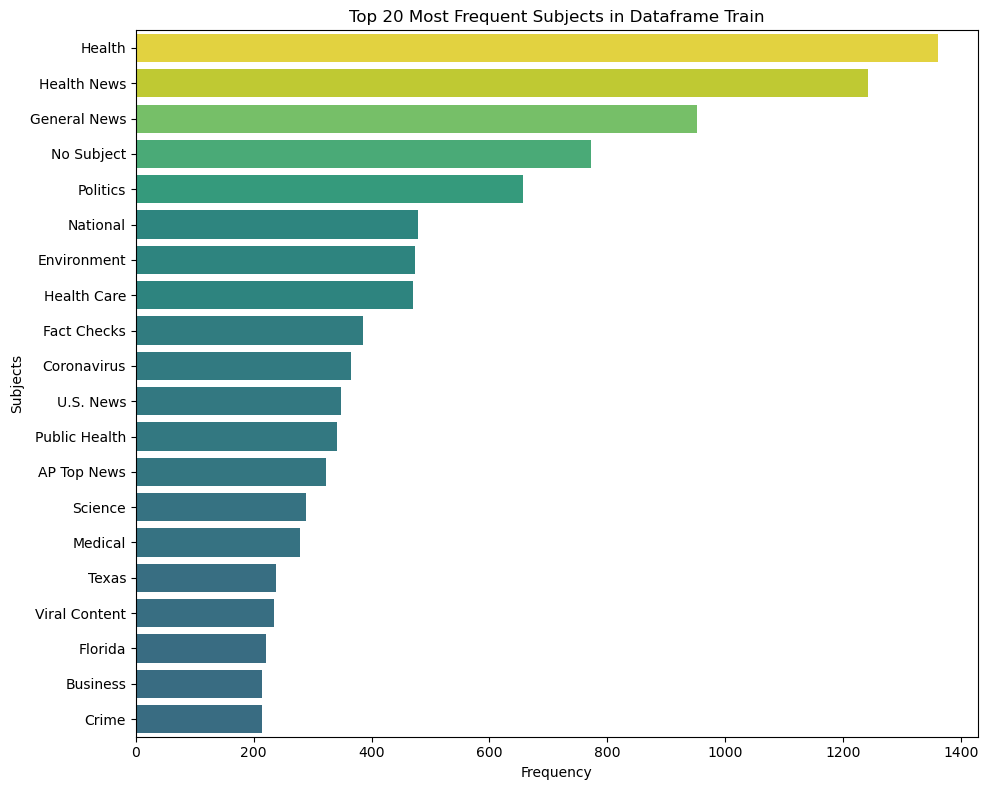

In [33]:
# Pulizia iniziale dei dati, inclusa la gestione dei soggetti vuoti
subjects_series = df_train['subjects'].dropna().str.strip().str.split(',')
subjects_series = subjects_series.apply(lambda x: [i.strip() for i in x if i.strip() != ''])
subjects_series = subjects_series.apply(lambda x: np.nan if len(x) == 0 else x)
exploded_subjects = subjects_series.explode()
exploded_subjects = exploded_subjects.fillna('No Subject')

# Calcolare la frequenza di ciascun soggetto, inclusi quelli etichettati come 'No Subject'
subject_counts = exploded_subjects.value_counts()

# Selezionare i primi 20 soggetti più frequenti
top_subjects = subject_counts.head(20)

# Normalizzazione delle frequenze per l'intensità del colore
norm_freqs = top_subjects / top_subjects.max()

# Generazione di colori sfumati in base alla frequenza
colors = [plt.get_cmap('viridis')(intensity) for intensity in norm_freqs * 0.75 + 0.25]  # Assicura una certa intensità minima

# Creazione del diagramma a barre
plt.figure(figsize=(10, 8))  # Dimensione aggiustata per migliorare la leggibilità
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette=colors)  # Utilizzo di seaborn per una migliore personalizzazione
plt.title('Top 20 Most Frequent Subjects in Dataframe Train')
plt.xlabel('Frequency')
plt.ylabel('Subjects')
plt.tight_layout()  # Aggiunge spazio intorno al grafico per evitare sovrapposizioni
plt.show()



### Knowledge Base

In [20]:
# Crea un subset con solo le righe che hanno label 'true'
knowledge_base = df_train[df_train['label'] == 'true']
knowledge_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5078 entries, 3 to 9829
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        5078 non-null   object
 1   claim           5078 non-null   object
 2   date_published  3191 non-null   object
 3   explanation     5078 non-null   object
 4   fact_checkers   5078 non-null   object
 5   main_text       5078 non-null   object
 6   sources         5077 non-null   object
 7   label           5078 non-null   object
 8   subjects        5078 non-null   object
dtypes: object(9)
memory usage: 396.7+ KB


In [21]:
print("Valori unici in 'subjects':")
print(knowledge_base['subjects'].nunique())
print(knowledge_base['subjects'].unique())

Valori unici in 'subjects':
2834
["Cancer,WebMD,women's health" ' ' 'Health News' ...
 'New Hampshire, Anxiety, Health, Manchester, General News, Insects, AP Top News, Bees, Iraq, Veterans, U.S. News'
 'Ruth Bader Ginsburg, Supreme courts, Cancer, Pancreatic cancer, General News, Politics, U.S. Supreme Court, Radiation therapy, AP Top News, Courts, Health'
 'Public Health, Florida, Carlos Gimenez, ']


In [22]:
# Rimuovere gli spazi bianchi all'inizio e alla fine di ogni stringa e dividere per virgola
subjects_series = knowledge_base['subjects'].dropna().str.strip().str.split(',')

# Pulire ogni elemento all'interno delle liste rimuovendo spazi extra
subjects_series = subjects_series.apply(lambda x: [i.strip() for i in x if i.strip() != ''])

# Aggiungere un passaggio per sostituire le liste vuote con un valore che indica l'assenza di soggetti
subjects_series = subjects_series.apply(lambda x: np.nan if len(x) == 0 else x)

# "Esplodere" la serie per avere ogni soggetto come una riga separata
exploded_subjects = subjects_series.explode()

# Se ci sono state liste vuote, ora saranno NaN, quindi sostituire NaN con un placeholder
# Se vuoi contare questi come una categoria separata, puoi sostituirli con una stringa specifica
exploded_subjects = exploded_subjects.fillna('No Subject')

# Calcolare le frequenze, inclusi i valori placeholder per le righe vuote
subject_frequencies = exploded_subjects.value_counts()

# Stampare le frequenze, che ora includono anche il conteggio per 'No Subject'
print(subject_frequencies)
print(len(subject_frequencies))


subjects
Health                  1361
Health News             1242
General News             952
Environment              405
U.S. News                348
                        ... 
Politics Environment       1
Josh Earnest               1
March for Science          1
David L. Lawrence          1
Carlos Gimenez             1
Name: count, Length: 2986, dtype: int64
2986


c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


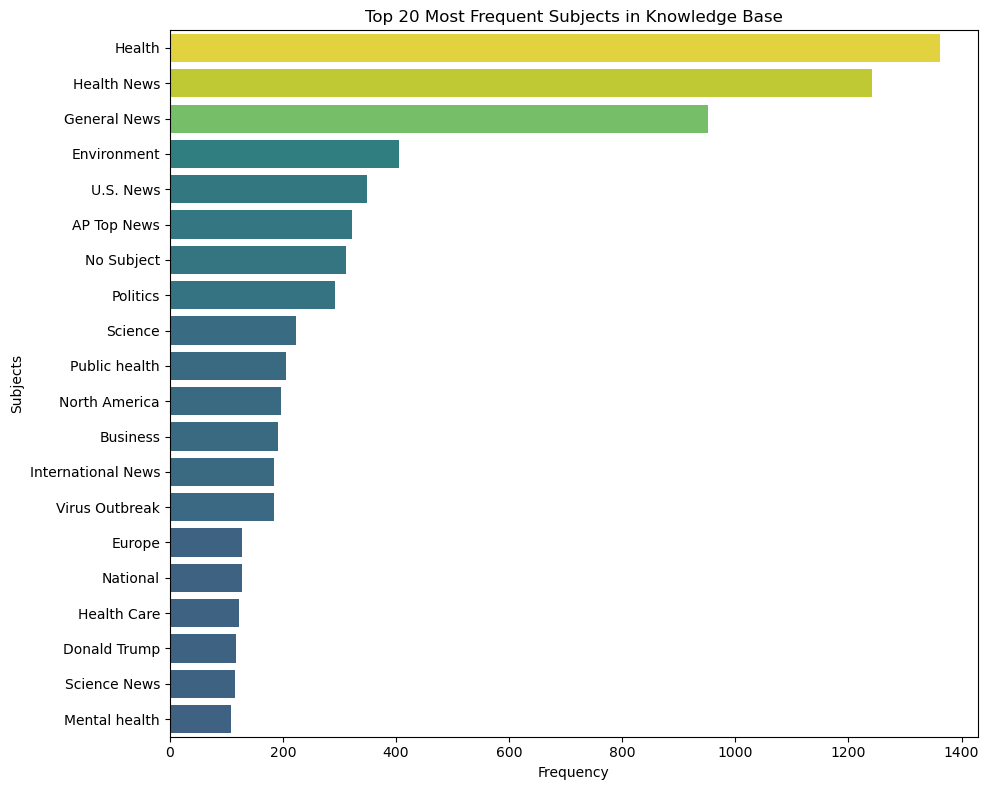

In [31]:
# Pulizia iniziale dei dati, inclusa la gestione dei soggetti vuoti
subjects_series = knowledge_base['subjects'].dropna().str.strip().str.split(',')
subjects_series = subjects_series.apply(lambda x: [i.strip() for i in x if i.strip() != ''])
subjects_series = subjects_series.apply(lambda x: np.nan if len(x) == 0 else x)
exploded_subjects = subjects_series.explode()
exploded_subjects = exploded_subjects.fillna('No Subject')

# Calcolare la frequenza di ciascun soggetto, inclusi quelli etichettati come 'No Subject'
subject_counts = exploded_subjects.value_counts()

# Selezionare i primi 20 soggetti più frequenti
top_subjects = subject_counts.head(20)

# Normalizzazione delle frequenze per l'intensità del colore
norm_freqs = top_subjects / top_subjects.max()

# Generazione di colori sfumati in base alla frequenza
colors = [plt.get_cmap('viridis')(intensity) for intensity in norm_freqs * 0.75 + 0.25]  # Assicura una certa intensità minima

# Creazione del diagramma a barre
plt.figure(figsize=(10, 8))  # Dimensione aggiustata per migliorare la leggibilità
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette=colors)  # Utilizzo di seaborn per una migliore personalizzazione
plt.title('Top 20 Most Frequent Subjects in Knowledge Base')
plt.xlabel('Frequency')
plt.ylabel('Subjects')
plt.tight_layout()  # Aggiunge spazio intorno al grafico per evitare sovrapposizioni
plt.show()

c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.

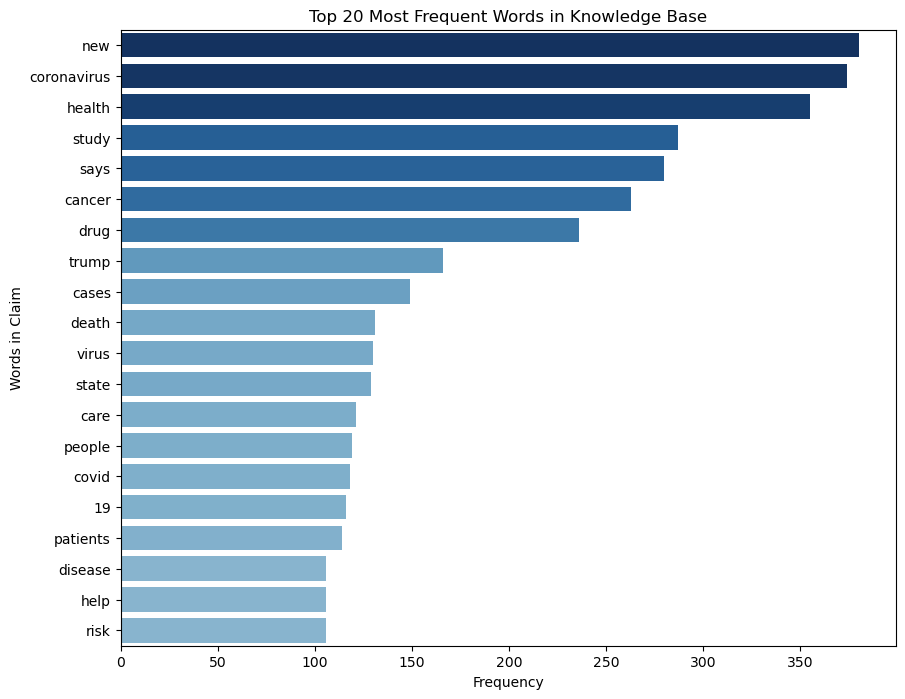

In [32]:
def plot_top_words(text_data, n=20, base_color='blue'):
    vec = CountVectorizer(stop_words='english').fit(text_data)
    bag_of_words = vec.transform(text_data)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, freqs = zip(*words_freq)
    
    # Normalizzazione delle frequenze per l'intensità del colore
    norm_freqs = np.array(freqs) / max(freqs)
    
    # Generazione di colori sfumati in base alla frequenza
    colors = [plt.get_cmap('Blues')(intensity) for intensity in norm_freqs * 0.75 + 0.25]  # Assicura una certa intensità minima
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(freqs), y=list(words), palette=colors)  # Utilizzo di 'palette' al posto di 'color'
    plt.title('Top 20 Most Frequent Words in Knowledge Base')
    plt.xlabel('Frequency')
    plt.ylabel('Words in Claim')
    plt.show()

# Applica la funzione a tutte le 'Claim' nel dataset, con sfumatura basata sulla frequenza
all_claims = knowledge_base['claim']
plot_top_words(all_claims, base_color='blue')  # 'base_color' non è più necessario ma mantenuto per coerenza

### Test Dataset


In [2]:
df_test = pd.read_csv(r'C:\Users\c.farallo\OneDrive - BE THINK, SOLVE, EXECUTE S.P.A\Desktop\Thesis\PUBHEALTH\test.tsv', sep='\t')
df_test

,Unnamed: 0,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,0,33456,A mother revealed to her child in a letter aft...,"November 6, 2011",The one-eyed mother story expounds upon two mo...,David Mikkelson,"In April 2005, we spotted a tearjerker on the ...",,false,Glurge Gallery
1,1,2542,Study says too many Americans still drink too ...,"February 25, 2013","On any given day in the United States, 18 perc...",,That means the great majority of Americans sta...,http://bit.ly/X1NVtW,true,Health News
2,2,26678,Viral image Says 80% of novel coronavirus case...,"March 13, 2020",The website Information is Beautiful published...,Paul Specht,"Amid the spread of the novel coronavirus, many...",https://www.facebook.com/informationisbeautifu...,true,"Facebook Fact-checks, Coronavirus, Viral image,"
3,3,40705,An email says that 9-year old Craig Shergold o...,"March 16, 2015",Send greeting or business cards to cancer vict...,Rich Buhler & Staff,Craig Shergold is real and in 1989...,https://www.reddit.com/submit?url=https%3A%2F%...,false,"Inspirational, Pleas"
4,4,35718,"Employees at a Five Guys restaurant in Daphne,...","July 15, 2020","What's undetermined: As of this writing, Five ...",Dan MacGuill,"In July 2020, amid a new wave of nationwide pr...",,unproven,Law Enforcement
...,...,...,...,...,...,...,...,...,...,...
1230,1230,3295,Christmas miracle for Florida dog whose heart ...,NaN,A Florida man was hoping for a Christmas mirac...,Associated Press,The heart of Gerald Ford’s 1-year-old French b...,https://www.gainesville.com/news/20200102/holi...,true,"Animals, Health, Florida, General News, Gaines..."
1231,1231,6904,Another dolphin dies at Arizona aquatic facility.,NaN,A fourth dolphin has died at a Phoenix-area aq...,,A statement from Dolphinaris Arizona in Scotts...,,true,"Arizona, Animals, Phoenix, Health, Dolphins"
1232,1232,13874,"What the facts say"" is ... ""the best scenario ...","July 17, 2016","Priebus said, ""What the facts say"" is ... ""the...",Lauren Carroll,Republican National Committee chairman Reince ...,https://www.nytimes.com/2016/07/13/us/politics...,false,"National, Children, Race and Ethnicity, Reince..."
1233,1233,2847,FDA advisory panel rejects J&J drug for acute ...,"January 16, 2014",Johnson & Johnson’s anticoagulant Xarelto shou...,,"The panel voted 10 to 0, with one abstention, ...",,true,Health News


In [35]:
print("Valori unici in 'label':")
print(df_test['label'].nunique())
print(df_test['label'].unique())

Valori unici in 'label':
4
['false' 'true' 'unproven' 'mixture' nan]


In [6]:
print("Valori unici in 'subjects':")
print(df_test['subjects'].nunique())
print(df_test['subjects'].unique())
true_label_count = df_test[df_test['label'] == 'true'].shape[0]
print(f"Numero di righe con label 'true': {true_label_count}")

Valori unici in 'subjects':
840
['Glurge Gallery' 'Health News'
 'Facebook Fact-checks, Coronavirus, Viral image, ' 'Inspirational, Pleas'
 'Law Enforcement' 'Politics, deep state, fbi, iran'
 'San Diego, Health, General News, Flu, Latin America, Border patrols, U.S. News'
 'Politics, flyer, hate speech, KKK'
 'Fraud & Scams, health, Health Care, scams' 'Cancer,HealthDay'
 'Uncategorized, apple valley, bare naked islam, muslims'
 'Food, Food Contamination' 'Health, Access to health care, Maine'
 'Junk News, news punch, your news wire'
 'American Academy of Neurology,interferon beta-1b'
 'Politics, nathan phillips'
 'Health, Measles, General News, Pennsylvania, York'
 'Facebook Fact-checks, California, Coronavirus, Facebook posts, '
 'History, American History, irish slaves, irish slaves myth' 'Politics'
 'Health, Lung disease, General News, Houston'
 'heart disease,Reuters Health' ' ' 'Environment'
 'Environment, Natural Disasters, Weather, PunditFact, Dana Perino, '
 'Fact Checks, Vir

In [7]:
# Prima, convertiamo la colonna 'subjects' in una serie di liste di subjects
subjects_series = df_test['subjects'].dropna().str.split(',')

# Ora, "esplodiamo" questa serie in modo che ogni elemento di ogni lista diventi una riga
exploded_subjects = subjects_series.explode()

# Calcoliamo la frequenza di ogni subject unico
subject_frequencies = exploded_subjects.value_counts()

# Stampiamo le frequenze
print(subject_frequencies)

subjects
                   322
Health News        142
 Health            124
 General News       89
Politics            79
                  ... 
 bank                1
 peanut allergy      1
 immigrants          1
 AmeriPAC            1
 Medical ethics      1
Name: count, Length: 1552, dtype: int64


In [8]:
# Rimuovere gli spazi bianchi all'inizio e alla fine di ogni stringa e dividere per virgola
subjects_series = df_test['subjects'].dropna().str.strip().str.split(',')

# Pulire ogni elemento all'interno delle liste rimuovendo spazi extra
subjects_series = subjects_series.apply(lambda x: [i.strip() for i in x if i.strip() != ''])

# Aggiungere un passaggio per sostituire le liste vuote con un valore che indica l'assenza di soggetti
subjects_series = subjects_series.apply(lambda x: np.nan if len(x) == 0 else x)

# "Esplodere" la serie per avere ogni soggetto come una riga separata
exploded_subjects = subjects_series.explode()

# Se ci sono state liste vuote, ora saranno NaN, quindi sostituire NaN con un placeholder
# Se vuoi contare questi come una categoria separata, puoi sostituirli con una stringa specifica
exploded_subjects = exploded_subjects.fillna('No Subject')

# Calcolare le frequenze, inclusi i valori placeholder per le righe vuote
subject_frequencies = exploded_subjects.value_counts()

# Stampare le frequenze, che ora includono anche il conteggio per 'No Subject'
print(subject_frequencies)
print(len(subject_frequencies))

subjects
Health            169
Health News       142
Politics           98
General News       92
National           66
                 ... 
cuba                1
health attacks      1
Jay Inslee          1
Creigh Deeds        1
Medical ethics      1
Name: count, Length: 1449, dtype: int64
1449


c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


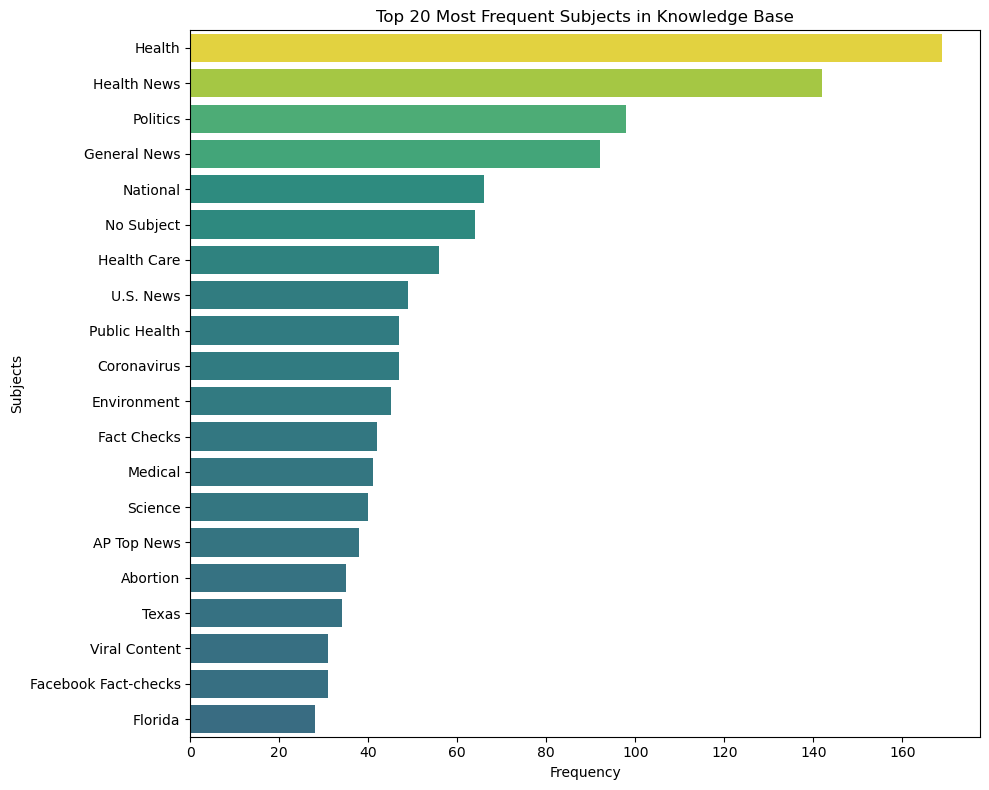

In [38]:
# Pulizia iniziale dei dati, inclusa la gestione dei soggetti vuoti
subjects_series = df_test['subjects'].dropna().str.strip().str.split(',')
subjects_series = subjects_series.apply(lambda x: [i.strip() for i in x if i.strip() != ''])
subjects_series = subjects_series.apply(lambda x: np.nan if len(x) == 0 else x)
exploded_subjects = subjects_series.explode()
exploded_subjects = exploded_subjects.fillna('No Subject')

# Calcolare la frequenza di ciascun soggetto, inclusi quelli etichettati come 'No Subject'
subject_counts = exploded_subjects.value_counts()

# Selezionare i primi 20 soggetti più frequenti
top_subjects = subject_counts.head(20)

# Normalizzazione delle frequenze per l'intensità del colore
norm_freqs = top_subjects / top_subjects.max()

# Generazione di colori sfumati in base alla frequenza
colors = [plt.get_cmap('viridis')(intensity) for intensity in norm_freqs * 0.75 + 0.25]  # Assicura una certa intensità minima

# Creazione del diagramma a barre
plt.figure(figsize=(10, 8))  # Dimensione aggiustata per migliorare la leggibilità
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette=colors)  # Utilizzo di seaborn per una migliore personalizzazione
plt.title('Top 20 Most Frequent Subjects in Dataframe Test')
plt.xlabel('Frequency')
plt.ylabel('Subjects')
plt.tight_layout()  # Aggiunge spazio intorno al grafico per evitare sovrapposizioni
plt.show()

c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\c.farallo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.

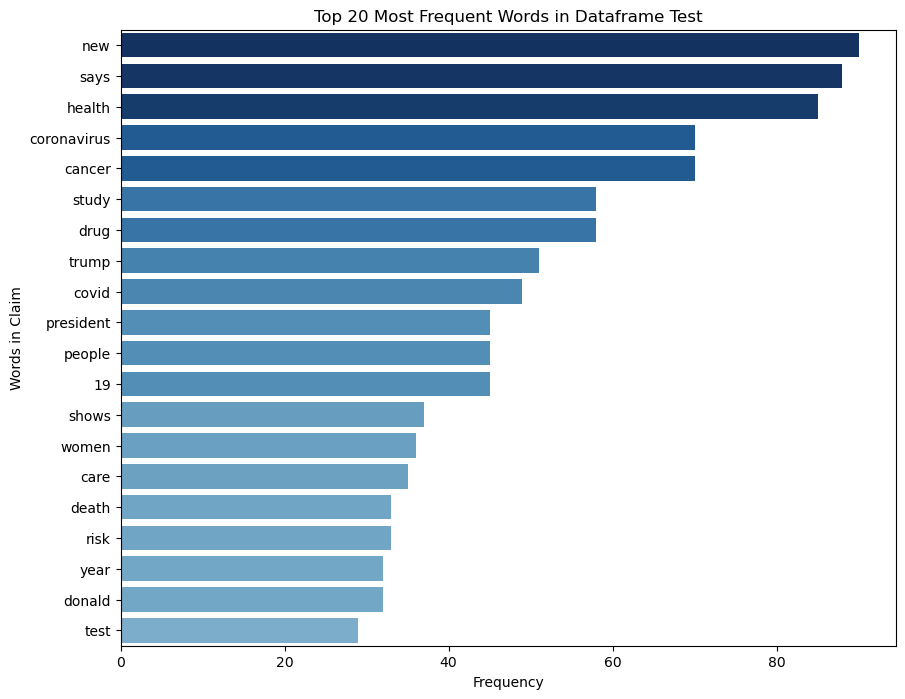

In [39]:
def plot_top_words(text_data, n=20, base_color='blue'):
    vec = CountVectorizer(stop_words='english').fit(text_data)
    bag_of_words = vec.transform(text_data)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, freqs = zip(*words_freq)
    
    # Normalizzazione delle frequenze per l'intensità del colore
    norm_freqs = np.array(freqs) / max(freqs)
    
    # Generazione di colori sfumati in base alla frequenza
    colors = [plt.get_cmap('Blues')(intensity) for intensity in norm_freqs * 0.75 + 0.25]  # Assicura una certa intensità minima
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(freqs), y=list(words), palette=colors)  # Utilizzo di 'palette' al posto di 'color'
    plt.title('Top 20 Most Frequent Words in Dataframe Test')
    plt.xlabel('Frequency')
    plt.ylabel('Words in Claim')
    plt.show()

# Applica la funzione a tutte le 'Claim' nel dataset, con sfumatura basata sulla frequenza
all_claims = df_test['claim']
plot_top_words(all_claims, base_color='blue')  # 'base_color' non è più necessario ma mantenuto per coerenza

## Save Files

* Al momento non c'è nessun pre-processing e l'esplorazione è limitata; prendiamo solo i dataset che ci servono.

* Prendiamo solo le colonne che ci serviranno per il progetto

In [50]:
#knowledge_base.to_csv('knowledge_base')
#df_test.to_csv('df_test')